## Monitoring the number of MPs who are interested in different topics

In [1]:
from tqdm import tqdm
tqdm.pandas()
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
wpqs = pd.read_csv('cleaned.csv')
wpqs['cleanedQuestion'].fillna('', inplace=True)
wpqs['topic'].fillna('', inplace=True)
wpqs['dateTabled'] = pd.to_datetime(wpqs.dateTabled)

#### Most popular topics of all time

### Most popular topics by number of MPs. 

To look at this, we need to limit our data to the current Parliament, which first sat in January 2020. 

In [3]:
pqs_sel = wpqs[wpqs.dateTabled > '2020-01-01']
pqs_sel = pqs_sel[pqs_sel.house == 'Commons']
pqs_sel = pqs_sel[pqs_sel.topic != '']

In [4]:
# Most popular topics every
topics_members = pqs_sel.groupby(['topic', 'askingMemberId']).count().id.reset_index().groupby('topic').nunique().sort_values('askingMemberId')[['askingMemberId']]

In [5]:
topics_members[topics_members.askingMemberId > 100].T

topic,china,developing countries,ministry of defence,small businesses,free school meals,broadband,roads,afghanistan,bus services,special educational needs,...,social security benefits,travel,nhs,coronavirus job retention scheme,children,business,universal credit,housing,schools,coronavirus
askingMemberId,101,101,101,104,104,106,110,110,111,112,...,182,188,191,193,197,203,204,208,225,415


In [6]:
topics = topics_members[topics_members.askingMemberId > 100].index.tolist()
topics.append('ukraine')
topics.append('russia')

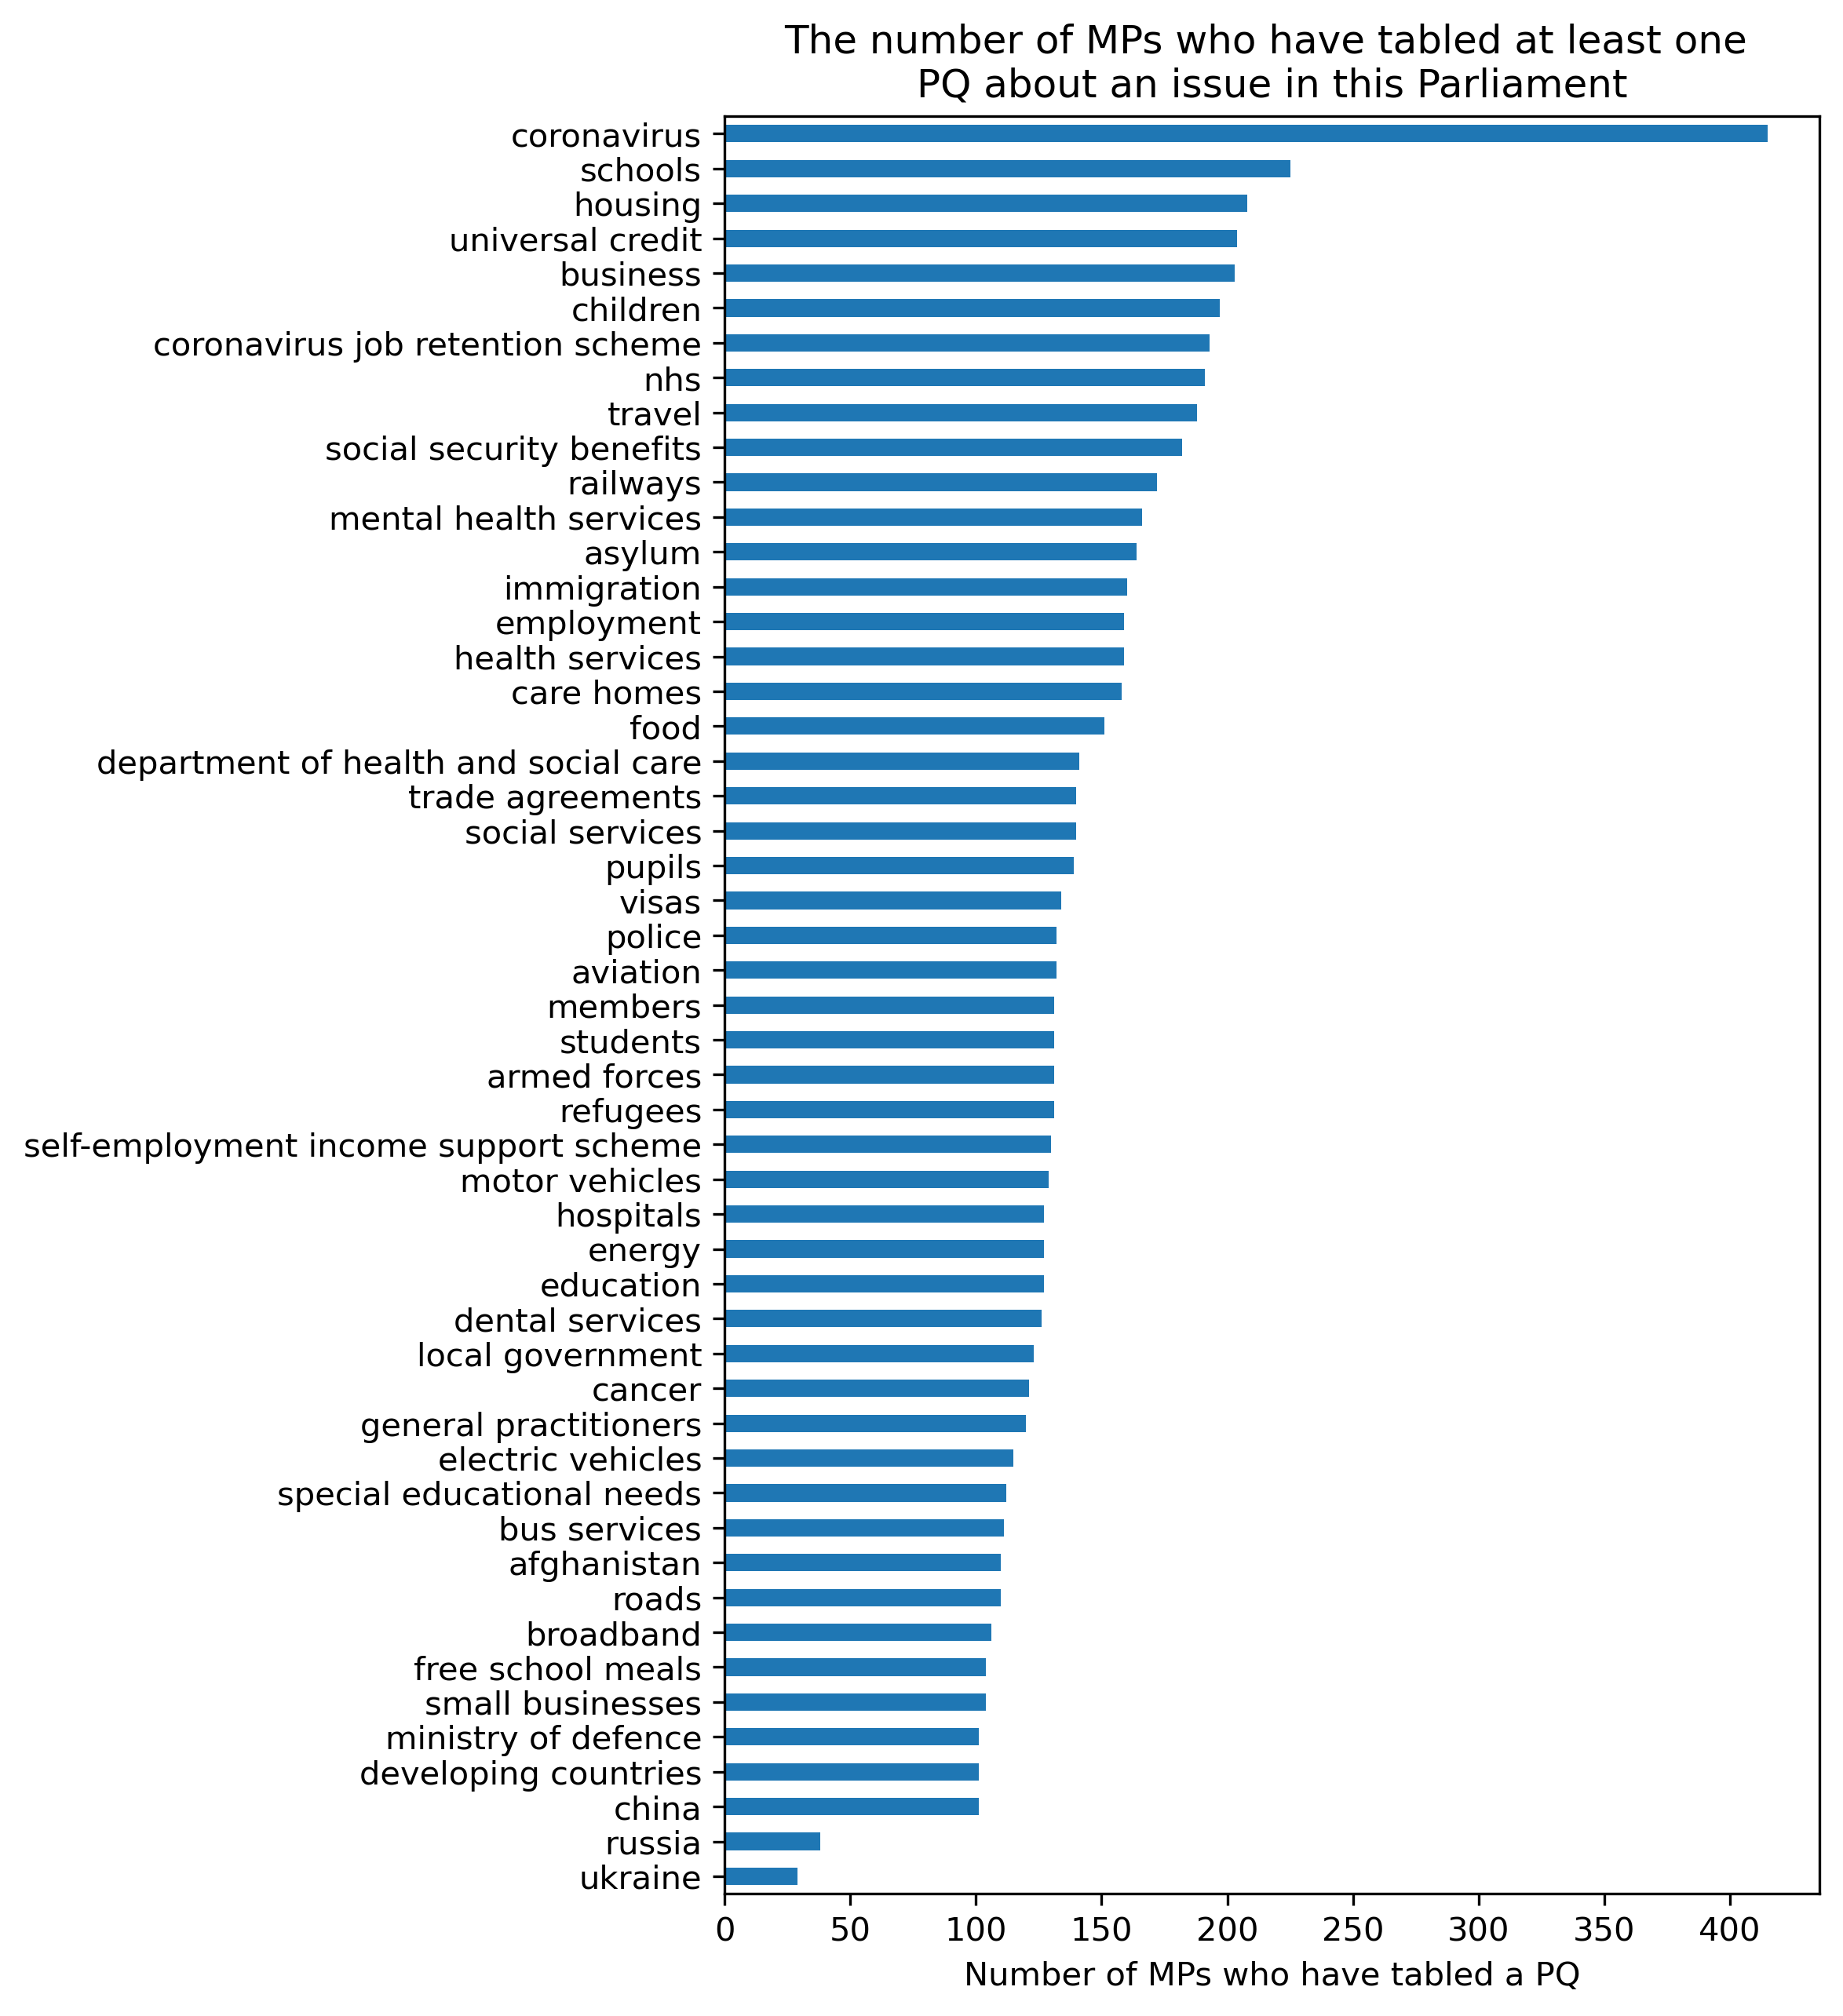

In [7]:
fig, ax = plt.subplots(figsize=(6, 10), dpi=300)

topics_members[topics_members.index.isin(topics)].plot(kind='barh', ax=ax, legend=False)
ax.set_title('The number of MPs who have tabled at least one \nPQ about an issue in this Parliament')
ax.set_ylabel('')
ax.set_xlabel('Number of MPs who have tabled a PQ')
plt.savefig('pq_plots/issues_mps.png', bbox_inches = 'tight')
plt.show()

Looking at individual issues.

In [8]:
pqs_sel.head()

,id,askingMemberId,askingMember,house,memberHasInterest,dateTabled,dateForAnswer,uin,questionText,answeringBodyId,answeringBodyName,heading,latestPartyabbreviation,topic,year_month,cleanedQuestion
251446,1172089,4658,NaN,Commons,False,2020-01-20,2020-01-22T00:00:00,5531,to ask the secretary of state for the home dep...,1,Home Office,animal experiments,Lab,animal experiments,2020-01,with reference to the statistics of scientifi...
251447,1172311,373,NaN,Commons,False,2020-01-21,2020-01-23T00:00:00,6016,"to ask the secretary of state for digital, cul...",10,"Department for Digital, Culture, Media and Sport",biometrics: private companies,Con,biometrics,2020-01,what plans his department has in place for the...
251448,1172949,4473,NaN,Commons,False,2020-01-23,2020-01-28T00:00:00,7256,to ask the secretary of state for the home dep...,1,Home Office,offences against children: victims,Lab,offences against children,2020-01,what plans she has to create pardonable offen...
251449,1174956,4473,NaN,Commons,False,2020-01-30,2020-02-03T00:00:00,10413,to ask the secretary of state for the home dep...,1,Home Office,home office: reviews,Lab,home office,2020-01,if she will publish the titles of the reviews...
251450,1174952,4473,NaN,Commons,False,2020-01-30,2020-02-03T00:00:00,10412,to ask the secretary of state for the home dep...,1,Home Office,home office: reviews,Lab,home office,2020-01,if she will publish the titles of the reports...


In [9]:
tipm = pqs_sel.groupby(['dateTabled', 'topic', 'latestPartyabbreviation']).nunique()[['id']].reset_index().set_index('dateTabled')
tipm = tipm[tipm.latestPartyabbreviation.isin(['Lab', 'Con', 'SNP', 'LD'])]
tipm = tipm[tipm.topic.isin(topics)]

In [10]:
tipm = tipm.pivot(columns=['topic', 'latestPartyabbreviation'], values='id').fillna(0)

In [11]:
parties = ['Lab', 'Con', 'LD', 'SNP']
colours = ['r', 'blue', 'yellow', 'gold']

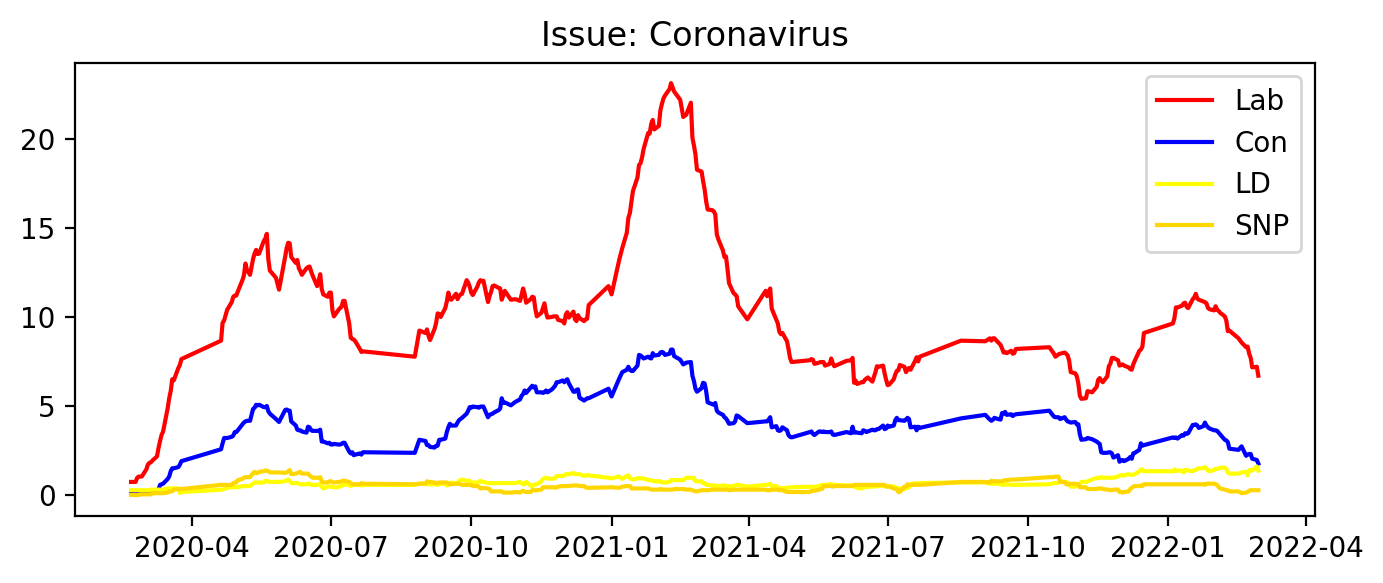

In [12]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'coronavirus'
plt_df = tipm[issue].rolling(30).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Issue: {}'.format(issue.title()))

plt.show()

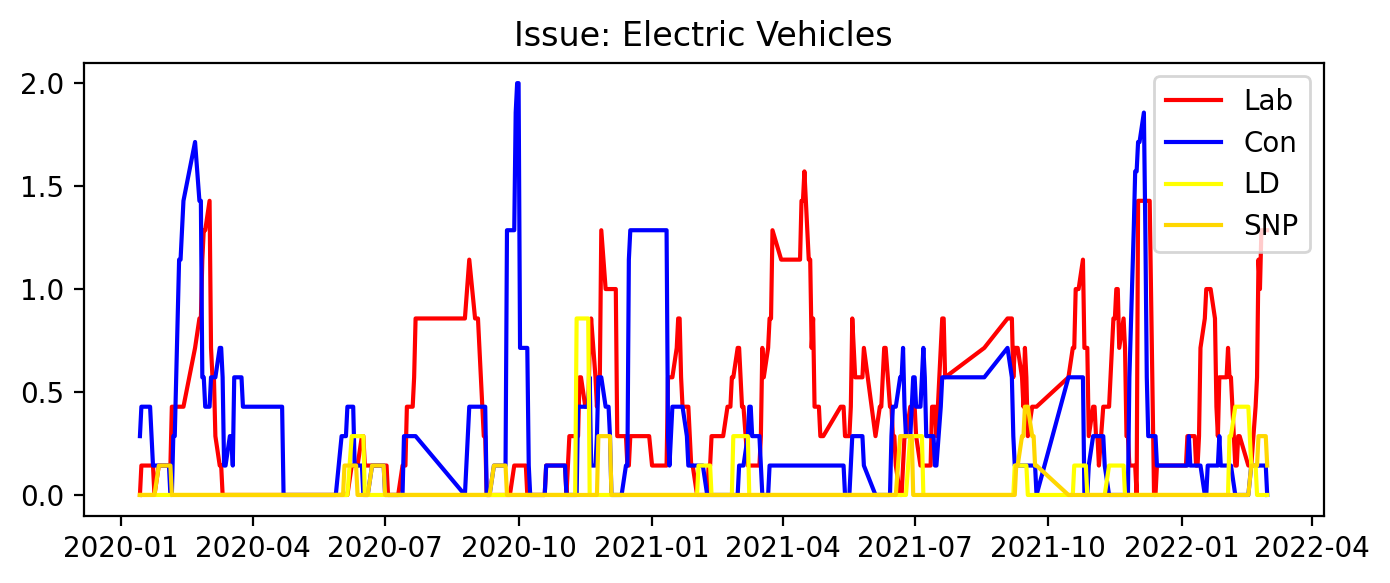

In [13]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'electric vehicles'
plt_df = tipm[issue].rolling(7).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Issue: {}'.format(issue.title()))

plt.show()

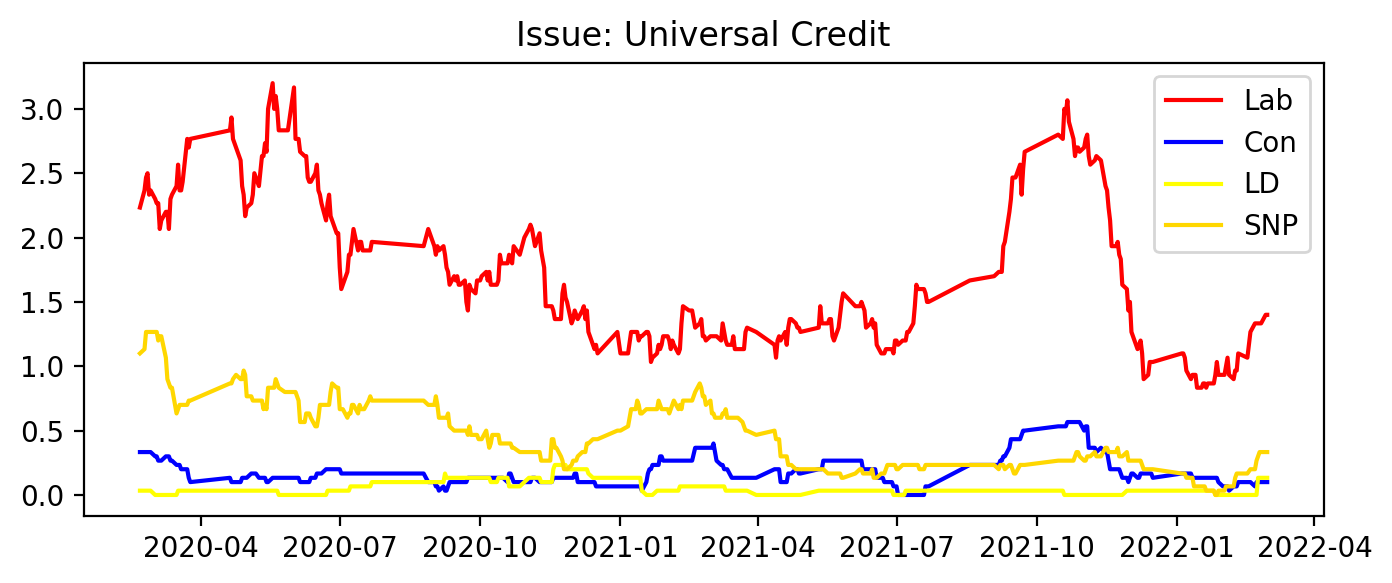

In [14]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'universal credit'
plt_df = tipm[issue].rolling(30).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Issue: {}'.format(issue.title()))

plt.show()

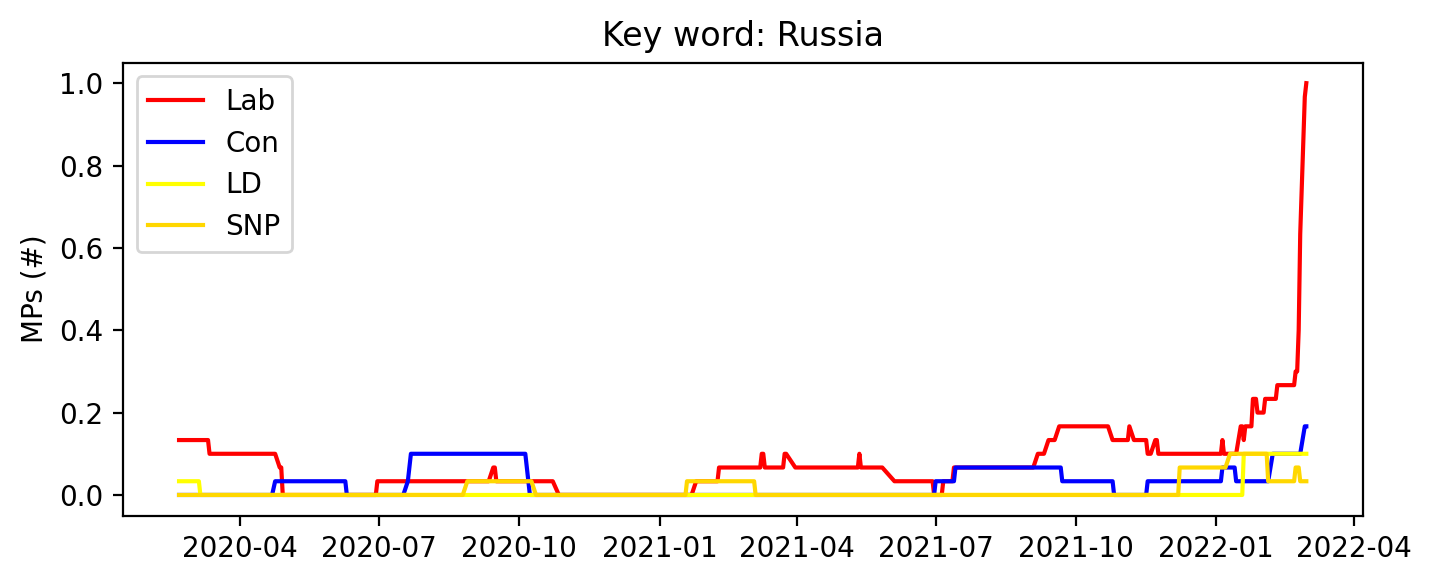

In [15]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'russia'
plt_df = tipm[issue].rolling(30).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Key word: {}'.format(issue.title()))
ax.set_ylabel('MPs (#)')


plt.show()

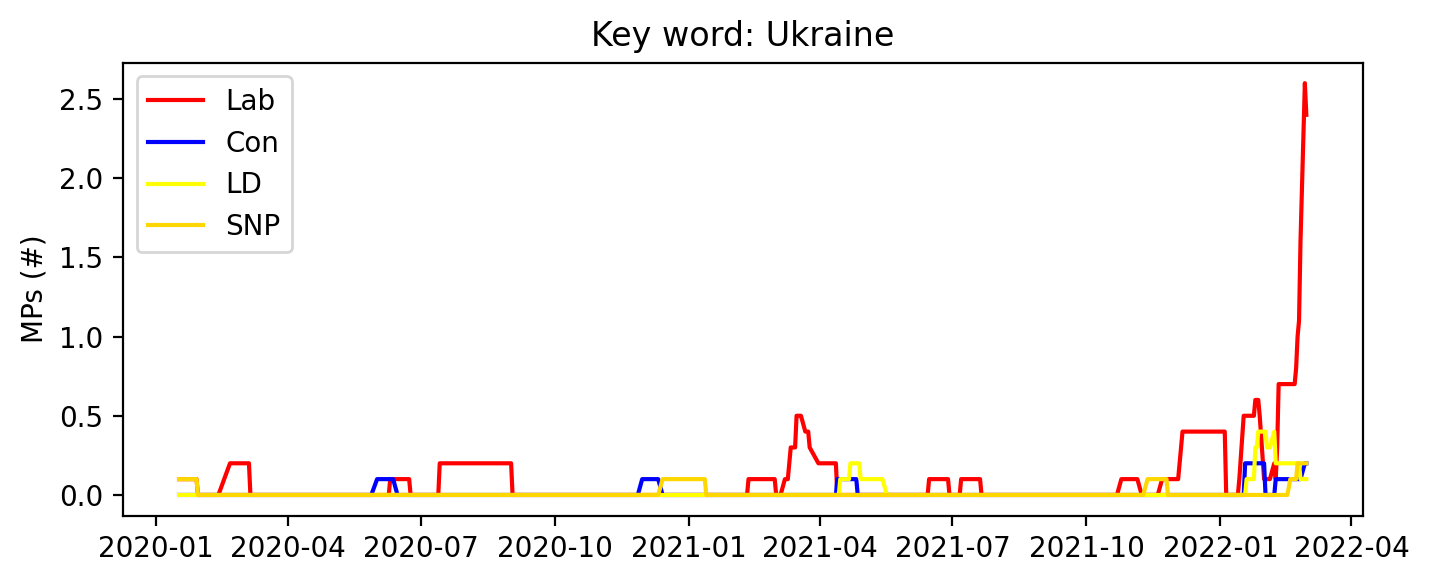

In [16]:
fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

issue = 'ukraine'
plt_df = tipm[issue].rolling(10).mean()
for i in range(len(parties)):
    ax.plot(plt_df[parties[i]], c=colours[i], label=parties[i])
ax.legend()
ax.set_title('Key word: {}'.format(issue.title()))
ax.set_ylabel('MPs (#)')


plt.show()

## Quesiton keyword tracking over time.

The formula below will take a keyword and track the number of MPs who have been tabling PQs containing that word or phrase over time, and break it down between the 4 main parties. 

In [17]:
def keyword_plot(issue, rolling_period = 0):
    fig, ax = plt.subplots(figsize=(8, 3), dpi=200)

    pqs_n_sel = wpqs[wpqs.house == 'Commons']
    isel = pqs_n_sel[['dateTabled', 'askingMemberId', 'latestPartyabbreviation', 'cleanedQuestion']]
    isel = isel[isel.cleanedQuestion.str.contains(issue)]
    
    if rolling_period > 0:
        for i in range(len(parties)):
            ax.plot(isel[isel.latestPartyabbreviation == parties[i]].set_index(['dateTabled']).resample('M').nunique().rolling(rolling_period).mean().askingMemberId, c=colours[i], label=parties[i])
    else: 
        for i in range(len(parties)):
            ax.plot(isel[isel.latestPartyabbreviation == parties[i]].set_index(['dateTabled']).resample('M').nunique().askingMemberId, c=colours[i], label=parties[i])
    ax.legend()
    ax.set_title('Key word: {}'.format(issue.title()))
    ax.set_ylabel('Monthly MPs tabling PQs')

    return fig

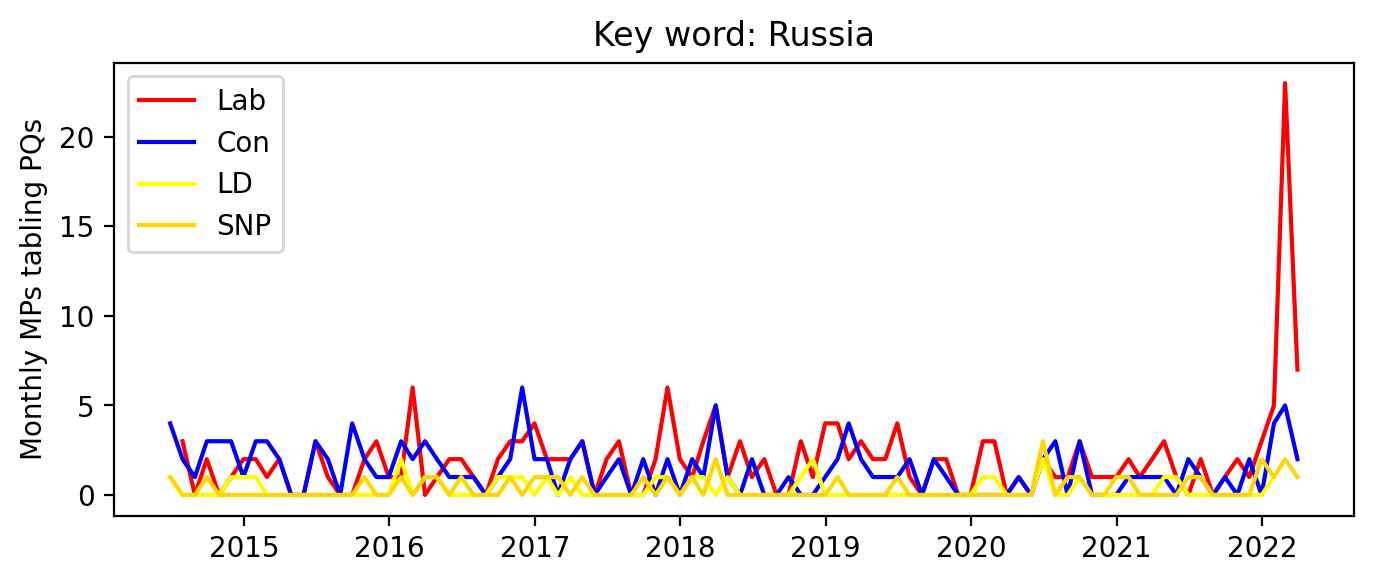

In [18]:
keyword_plot('russia')
plt.savefig('pq_plots/russia.png')
plt.show()

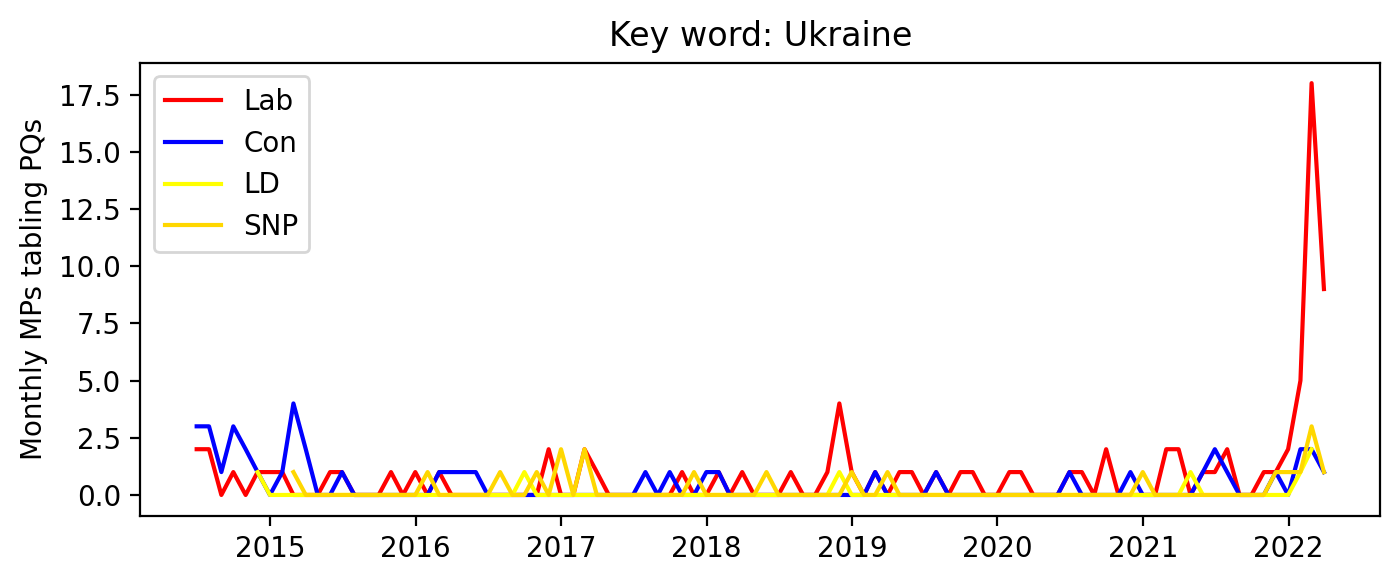

In [19]:
keyword_plot('ukraine')
plt.savefig('pq_plots/ukraine.png')
plt.show()

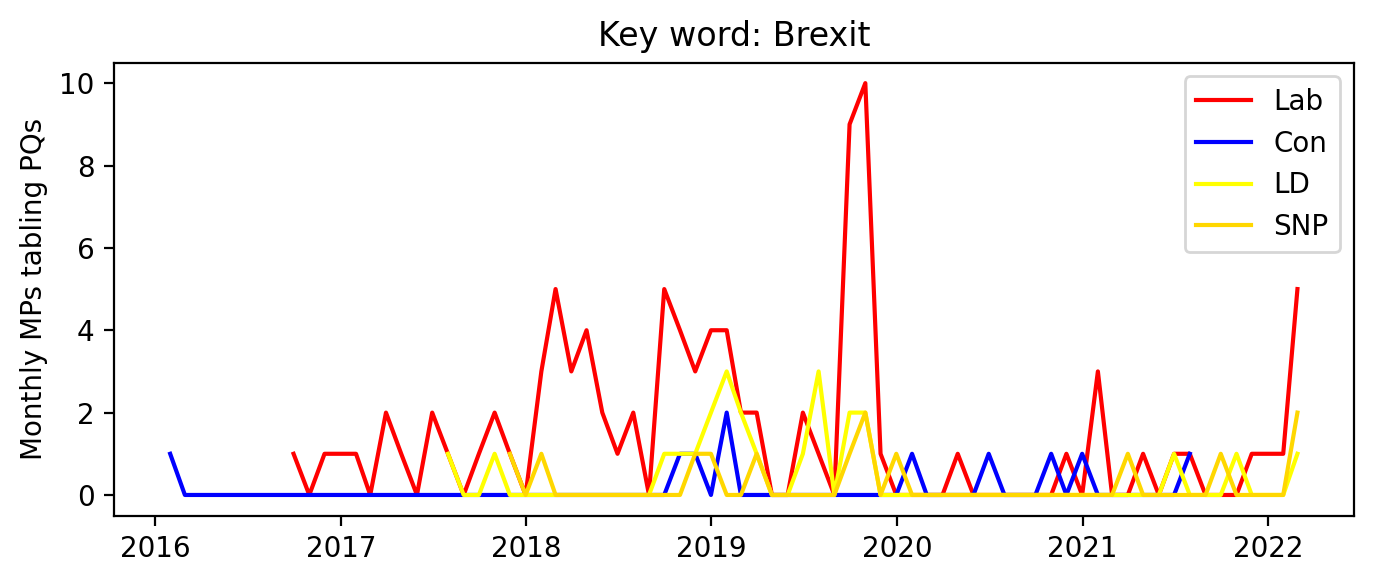

In [20]:
keyword_plot('brexit')
plt.show()


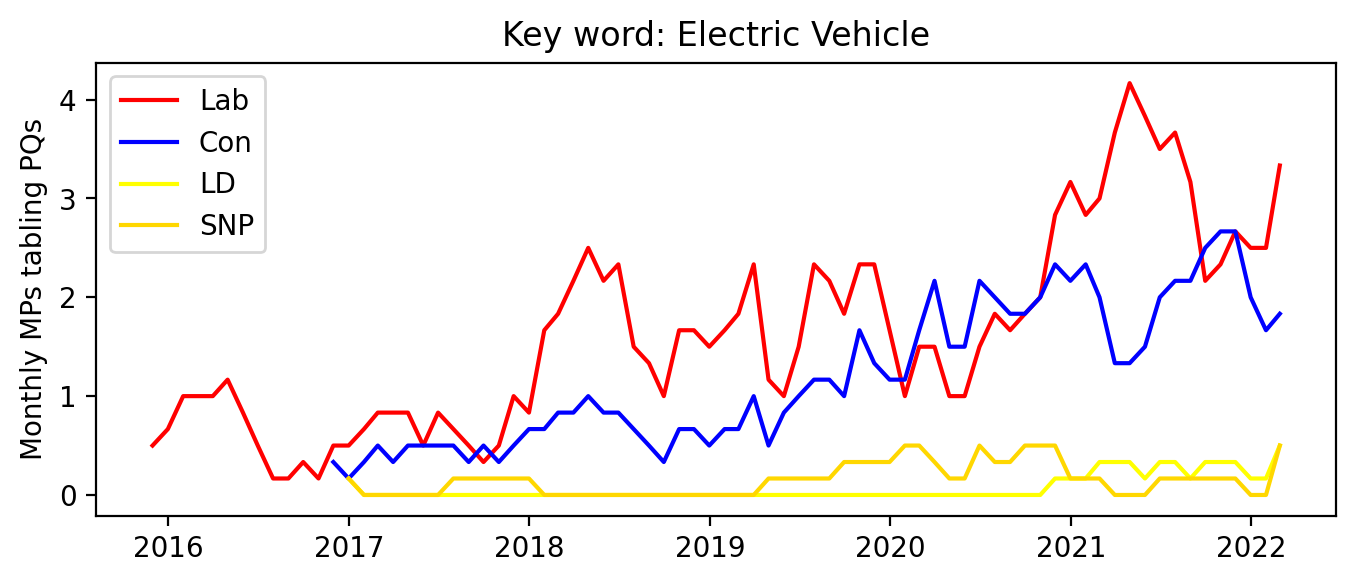

In [21]:
keyword_plot('electric vehicle', rolling_period=6)
plt.savefig('pq_plots/evs.png')
plt.show()

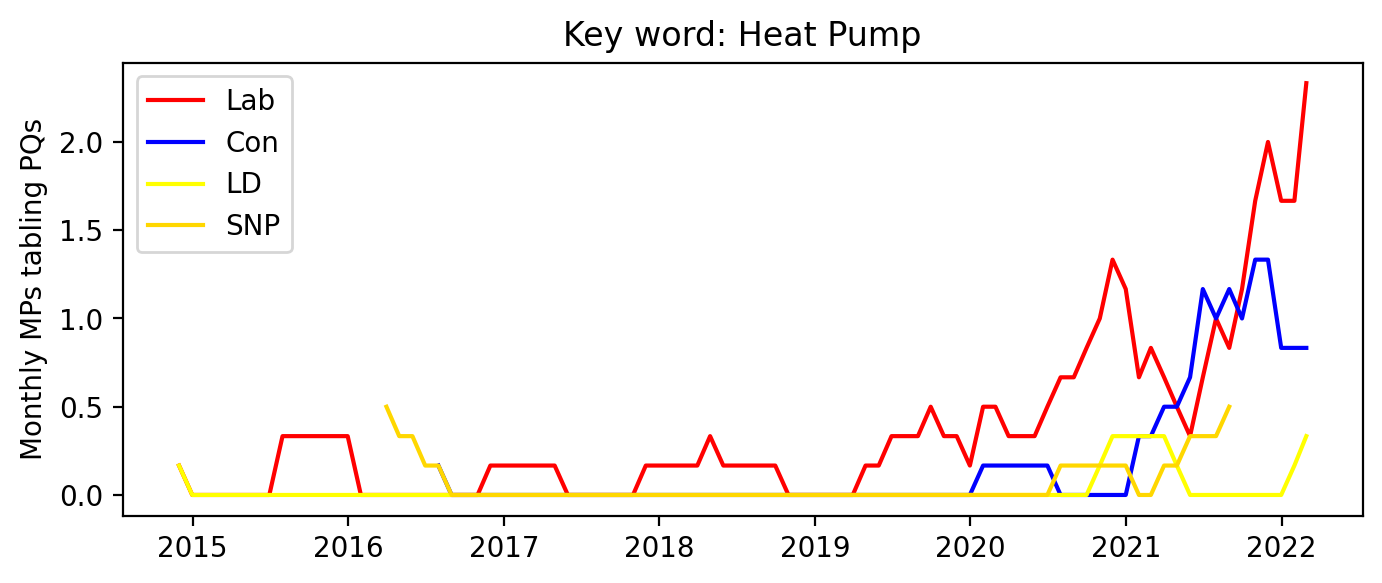

In [22]:
keyword_plot('heat pump', rolling_period=6)
plt.savefig('pq_plots/hp.png')
plt.show()

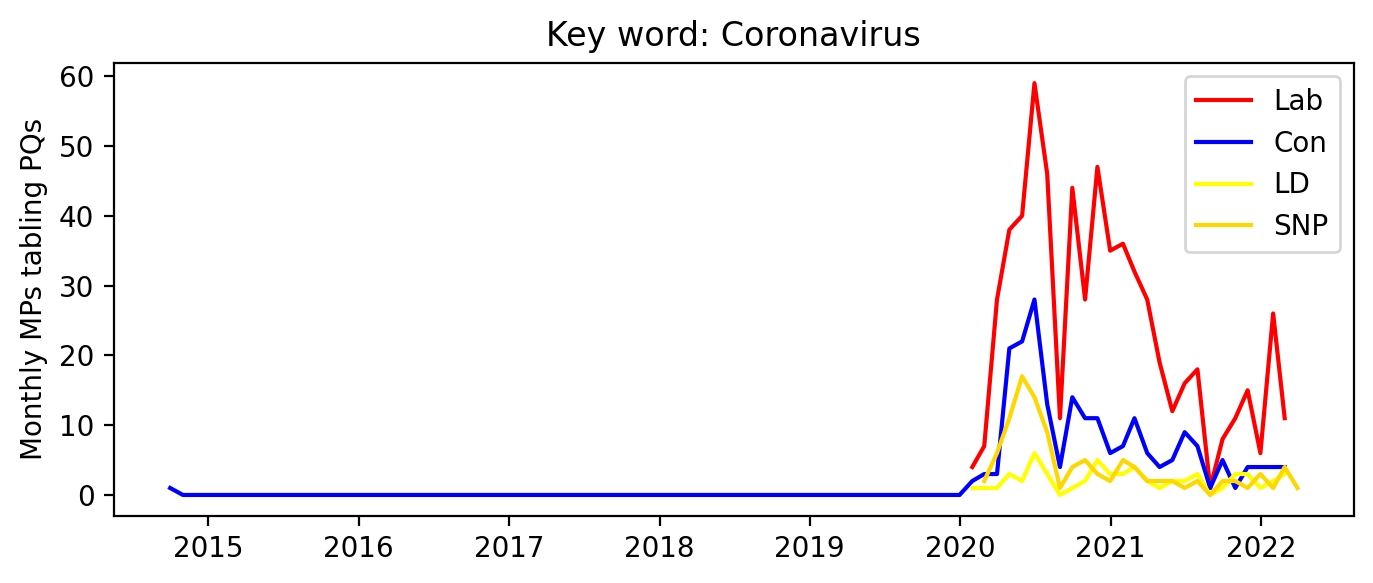

In [23]:
keyword_plot('coronavirus')
plt.show()

In [24]:
wpqs[wpqs.cleanedQuestion.str.contains('coronavirus')].head()

,id,askingMemberId,askingMember,house,memberHasInterest,dateTabled,dateForAnswer,uin,questionText,answeringBodyId,answeringBodyName,heading,latestPartyabbreviation,topic,year_month,cleanedQuestion
10970,92241,4006,NaN,Commons,False,2014-09-26,2014-10-14T00:00:00,209666,"to ask the secretary of state for health, what...",17,Department of Health,viral diseases,Con,viral diseases,2014-09,what steps his department has taken to raise a...
37519,386101,248,NaN,Lords,False,2015-06-29,2015-07-13T00:00:00,HL900,to ask her majesty’s government what research ...,17,Department of Health,infectious diseases,LD,infectious diseases,2015-06,what research is being supported by public hea...
251776,1174481,457,NaN,Lords,False,2020-01-29,2020-02-12T00:00:00,HL941,to ask her majesty's government what measures ...,16,Foreign and Commonwealth Office,hong kong: british nationals abroad,Lab,hong kong,2020-01,what measures they are taking to assist britis...
251817,1175340,1796,NaN,Lords,False,2020-01-27,2020-02-10T00:00:00,HL810,to ask her majesty's government what plans the...,27,Department for Transport,aviation: china,NaN,aviation,2020-01,what plans they have if any to temporarily ban...
252140,1173451,4478,NaN,Commons,False,2020-01-27,2020-01-29T00:00:00,8371,to ask the secretary of state for health and s...,17,Department of Health and Social Care,coronavirus,Con,coronavirus,2020-01,and social care what steps the government is t...


In [ ]:
wpqs.